# 6.3 자전거 대여 수요 예측 경진대회 탐색적 데이터 분석

### 탐색적 데이터 분석(Exploratory Data Analysis, EDA)이란?
- 주어진 데이터를 면밀히 살펴보는 과정

  <div>
    <img src="https://i.ibb.co/hCgTx0v/1.png" width="650"/>
  </div>

### 데이터의 종류

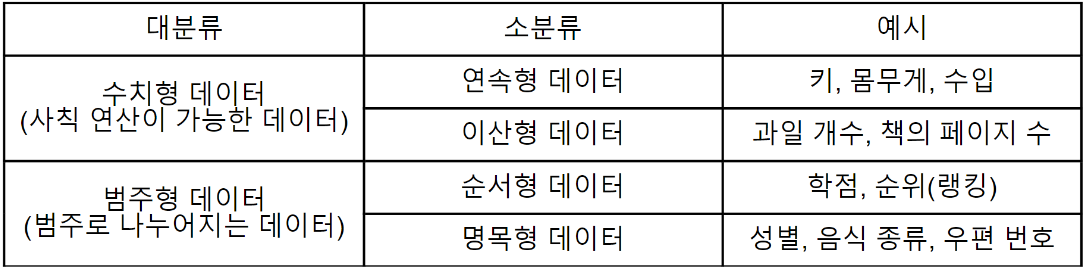

## 6.3.2 데이터 둘러보기
- 판다스로 훈련, 테스트, 제출 샘플 데이터를 DataFrame 형태로 불러오기

In [8]:
import numpy as np
import pandas as pd # 판다스 임포트

# 데이터 경로
data_path = 'C:\\vscode\\kaggle\\dataset\\bike-sharing-demand_dat\\'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

- 훈련 데이터와 테스트 데이터 크기 확인

In [9]:
train.shape, test.shape

((10886, 12), (6493, 9))

- 훈련 데이터 둘러보기

In [10]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


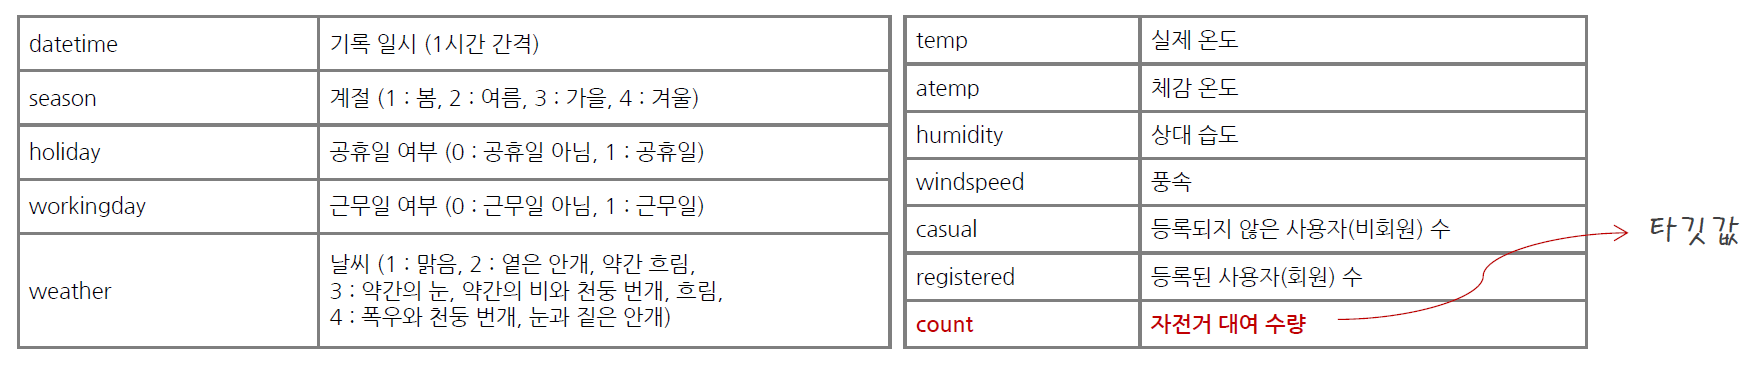

- 테스트 데이터 둘러보기

In [11]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


- 테스트 데이터에는 casual과 registered 피처가 빠짐
- 예측 시 사용하는 데이터가 테스트 데이터인데, 테스트 데이터에 casual과 registered 피처가 없으므로 모델 훈련 시에도 훈련 데이터의 casual과 registered 피처를 빼야 함

#### **<font color='orange'>[분석 결과] casual, registered 피처 제거</font>**

- 제출 샘플 데이터 둘러보기

In [12]:
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


- 데이터를 구분하는 ID 값(여기서는 datetime)과 타깃값으로 구성
- 현재 타깃값인 count는 모두 0으로 기록됨(시간대별 대여 수량을 예측해 이 값을 바꾼 뒤 제출하면 됨)
- ID 값인 datetime은 데이터를 구분하는 역할만 함, 타깃값 예측에는 아무런 도움을 주지 않아 추후 모델 훈련 시 제거할 계획

#### **<font color='orange'>[분석 결과] datetime 피처 제거</font>**

- 결측값 개수와 데이터 타입 파악

In [13]:
train.info()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
test.info()
#결측값 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 6.3.3 더 효과적인 분석을 위한 피처 엔지니어링

- 기본적인 분석을 마쳤다면 다음은 데이터 시각화를 할 차례  
 - 다양한 관점에서 시각화 해보면 날 데이터 상태에서는 찾기 어려운 경향, 공통점, 차이점 등이 드러날 수 있음
- 일부 데이터는 시각화하기에 적합하지 않은 형태일 수 있음(ex. datetime)  
 - 시각화하기 전에 datetime 피처를 분석하기에 적합한 형태로 변환해야 함
- datetime 피처를 세부 구성요소(연도, 월, 일, 시간, 분, 초, 요일)로 나누기 

In [15]:
train['datetime'] = pd.to_datetime(train['datetime']) # datetime 타입으로 바꾸기

In [17]:
train['year'] = train['datetime'].dt.year          # 연도
train['month'] = train['datetime'].dt.month        # 월
train['day'] = train['datetime'].dt.day            # 일
train['hour'] = train['datetime'].dt.hour          # 시간
train['minute'] = train['datetime'].dt.minute      # 분
train['second'] = train['datetime'].dt.second      # 초
train['weekday'] = train['datetime'].dt.day_name() # 요일

In [18]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,Wednesday


#### **<font color='orange'>[분석 결과] 연도, 월, 일, 시간, 분, 초, 요일 피처 추가</font>**

- season과 weather 피처 변경
 - 두 피처는 범주형 데이터인데 숫자로 표현되어 있어서 의미 파악이 어려움
 - 시각화 시 의미가 잘 드러나도록 map( ) 함수를 사용해 문자열로 변환

In [19]:
train['season'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

- 바뀐 훈련 데이터

In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


- year, month, day, hour, minute, second, weekday 피처 추가됨
- season과 weather 피처는 숫자에서 문자로 바뀜
- 세 달씩 ‘월’을 묶으면 ‘계절’이 되므로 추후 season 피처만 남기고 month 피처는 제거

#### **<font color='orange'>[분석 결과] month 피처 제거</font>**

## 6.3.4 데이터 시각화

- 시각화는 탐색적 데이터 분석에서 가장 중요한 부분
 - 데이터 분포나 데이터 간 관계를 한눈에 파악
 - 모델링에 도움될 정보를 얻을 수 있음

- 시각화에 앞서 두 라이브러리를 임포트
 - `matplotlib`은 파이썬으로 데이터를 시각화할 때 표준처럼 사용하는 라이브러리
 - `seaborn`은 `matplotlib`에 고수준 인터페이스를 덧씌운 라이브러리
- 그래프 자체에 관한 좀 더 자세한 설명은 <머신러닝·딥러닝 문제해결 전략> 4장 참고

In [21]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### 분포도
- 분포도(distribution plot)는 수치형 데이터의 집계 값(총 개수나 비율 등)을 나타내는 그래프

- 타깃값(count)의 분포도 그려보기
 - 타깃값 분포도를 통해 타깃값을 그대로 사용할지 변환해 사용할지 결정할 수 있음

C:\Users\HA\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


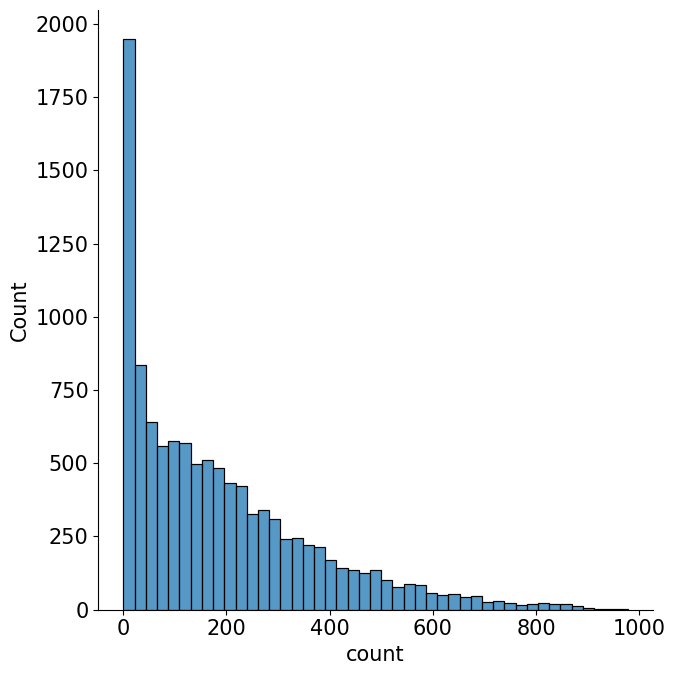

In [24]:
plt.rc('font', size=15)                # 폰트 크기를 15로 설정 
sns.displot(train['count'], height=7); # 분포도 출력

- x축은 타깃값(count), y축은 총 개수
- 분포가 왼쪽으로 편향됨
- 회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따르는 게 좋음
- 따라서, 타깃값을 정규분포에 가깝게 만들어주는 작업 필요
- 이때 사용하는 방법이 로그변환!

- 타깃값 로그변환
 - 다만, 마지막에 지수변환해 실제 타깃값인 count로 복원해야 함

C:\Users\HA\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


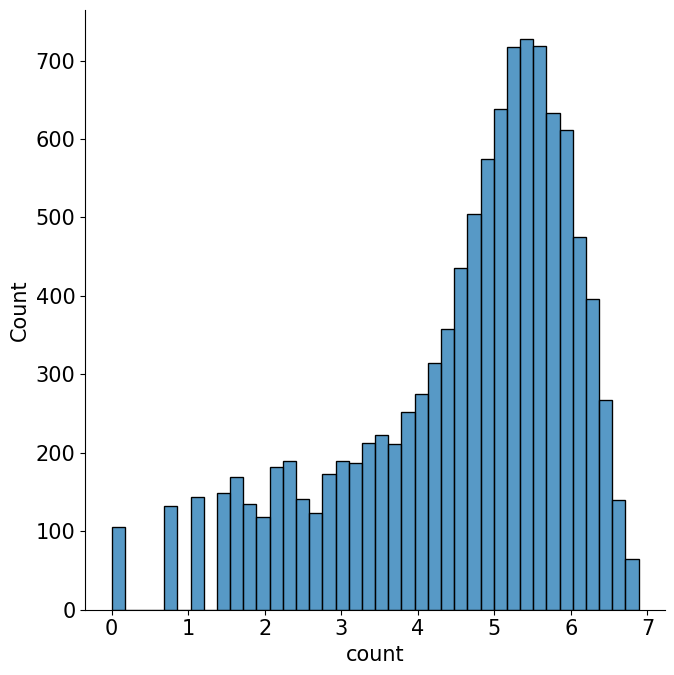

In [25]:
sns.displot(np.log(train['count']), height=7);

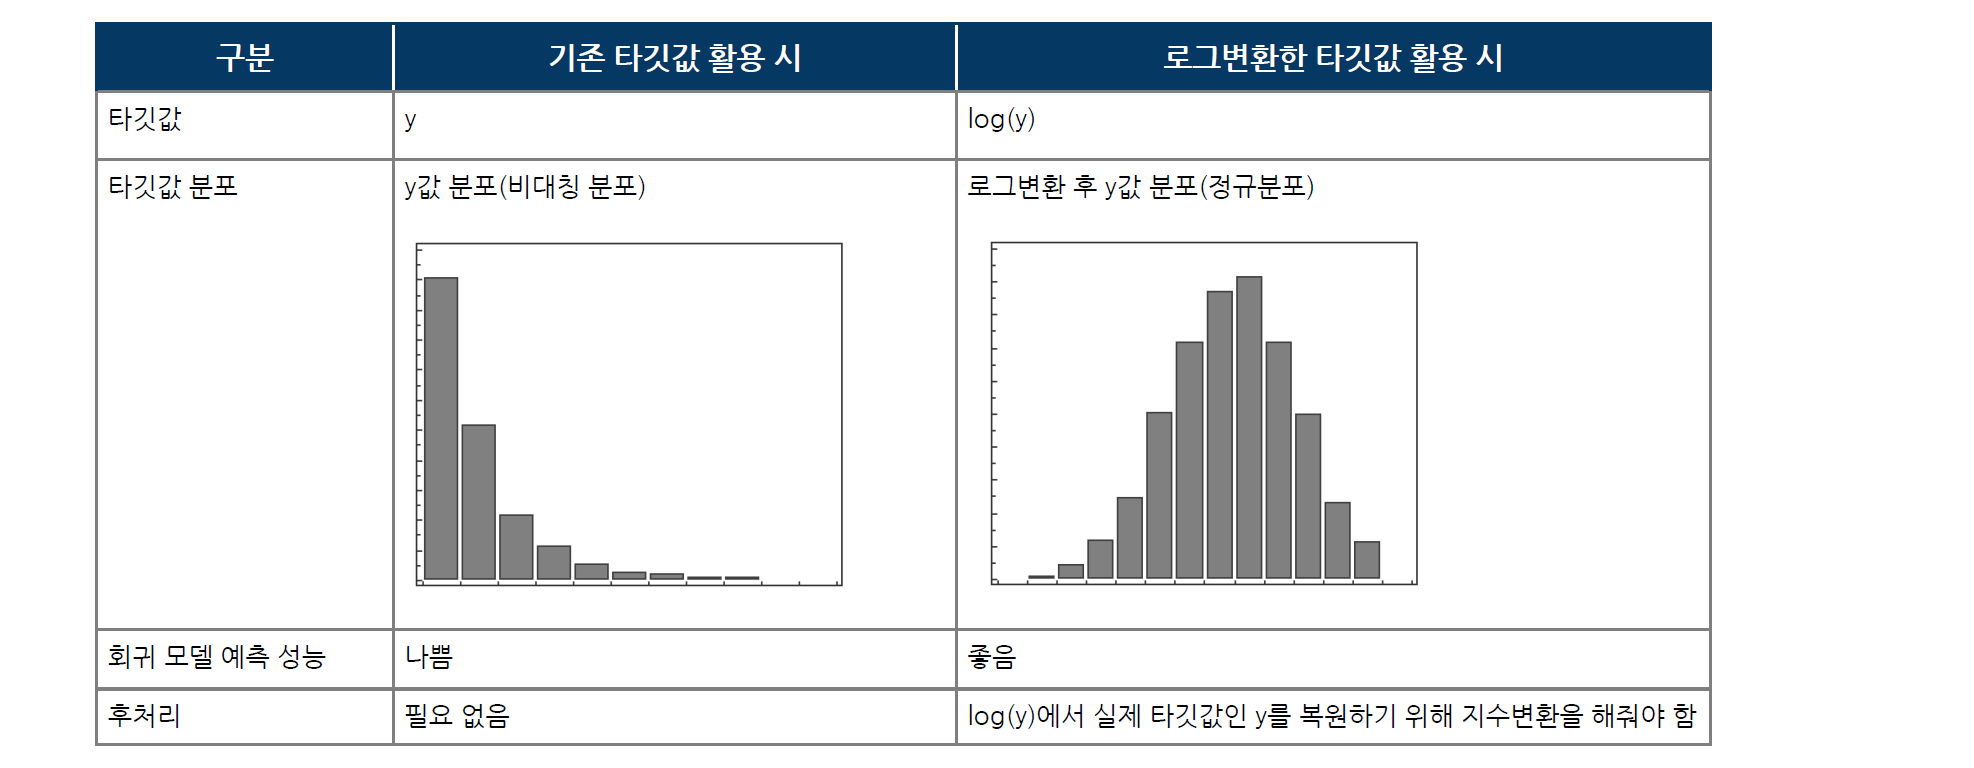

#### **<font color='orange'>[분석 결과] 타깃값을 count가 아닌 log(count)로 변환해 사용</font>**
#### **<font color='orange'>[분석 결과] 마지막에 지수변환해 count로 복원</font>**

### 막대 그래프
- 연도, 월, 일, 시, 분, 초별 평균 대여 수량을 막대 그래프로 시각화

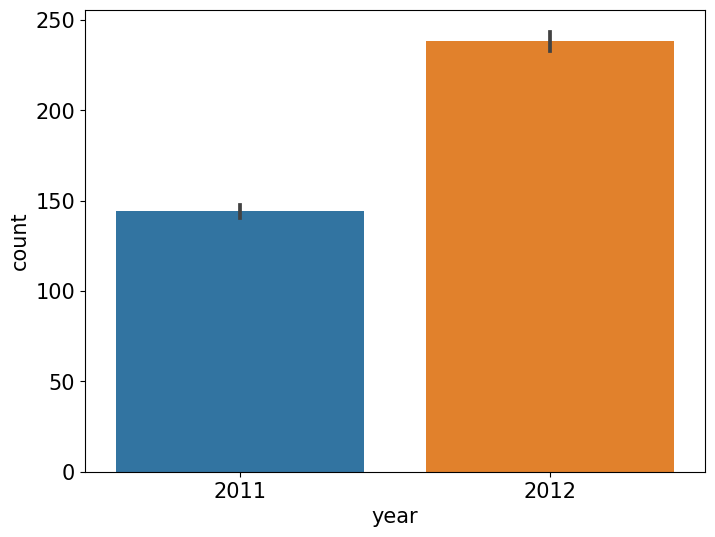

In [26]:
plt.figure(figsize=(8, 6)) # 그래프 크기 설정

# 연도별 자전거 평균 대여 수량
sns.barplot(x='year', y='count', data=train);

- ① 연도별 평균 대여 수량 : 2011년보다 2012년에 대여가 많음

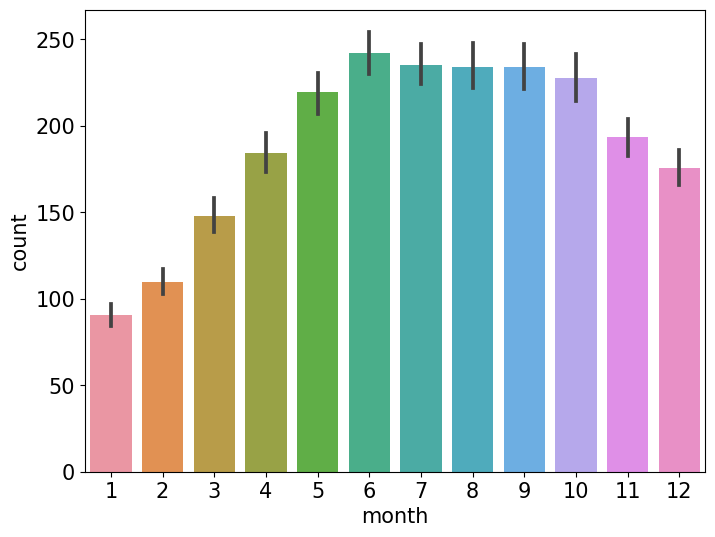

In [27]:
plt.figure(figsize=(8, 6))

# 월별 자전거 평균 대여 수량
sns.barplot(x='month', y='count', data=train);

- ② 월별 평균 대여 수량 : 날이 더울수록 대여가 많음

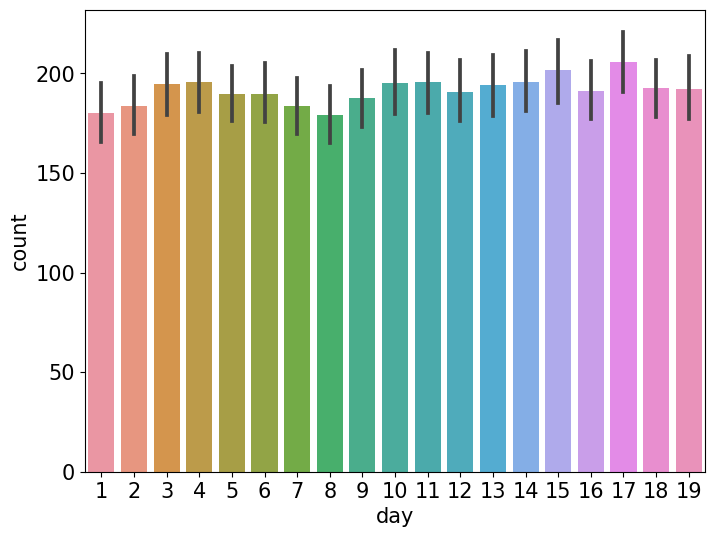

In [28]:
plt.figure(figsize=(8, 6))

# 일별 자전거 평균 대여 수량
sns.barplot(x='day', y='count', data=train);

- ③ 일별 평균 대여 수량 : 일별 평균 대여 수량은 큰 차이가 없거니와, 훈련 데이터(1일\~19일)와 테스트 데이터(20일\~월말)의 day 피처가 서로 달라 day 피처는 모델링 시 사용 못함

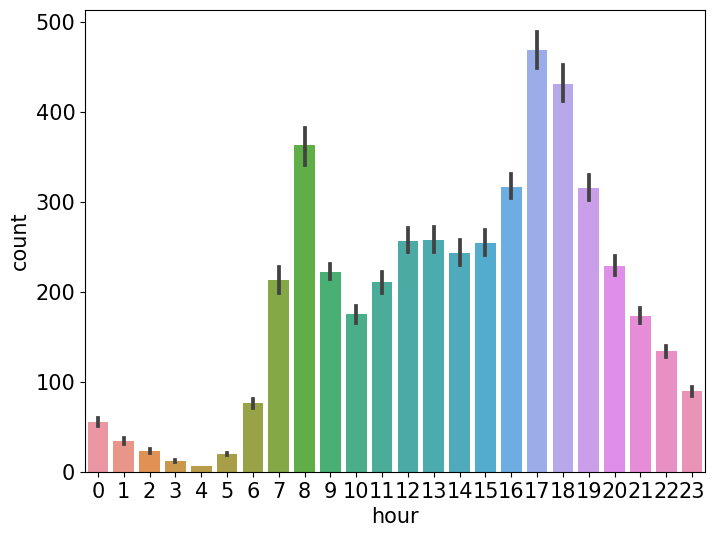

In [29]:
plt.figure(figsize=(8, 6))

# 시간별 자전거 평균 대여 수량
sns.barplot(x='hour', y='count', data=train);

- ④ 시간별 평균 대여 수량 : 쌍봉형(출퇴근, 등하교 시간에 이용량이 많음)

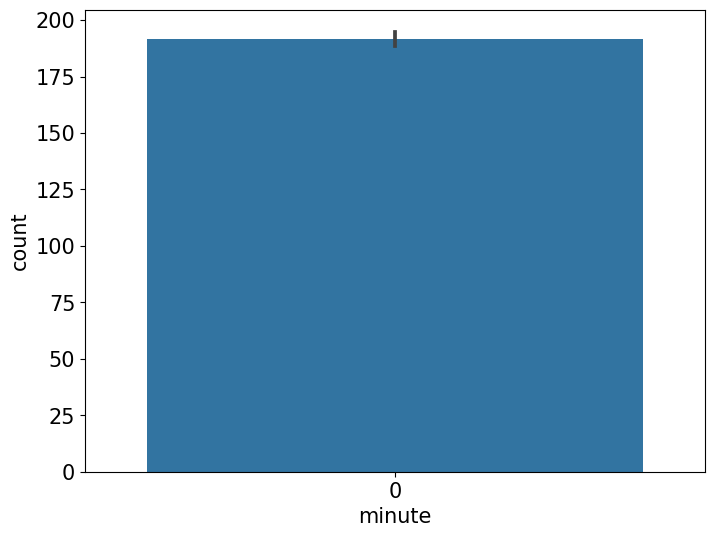

In [30]:
plt.figure(figsize=(8, 6))

# 분별 자전거 평균 대여 수량
sns.barplot(x='minute', y='count', data=train);

# ⑤ 분별 평균 대여 수량 : 아무런 정보가 없어 제거

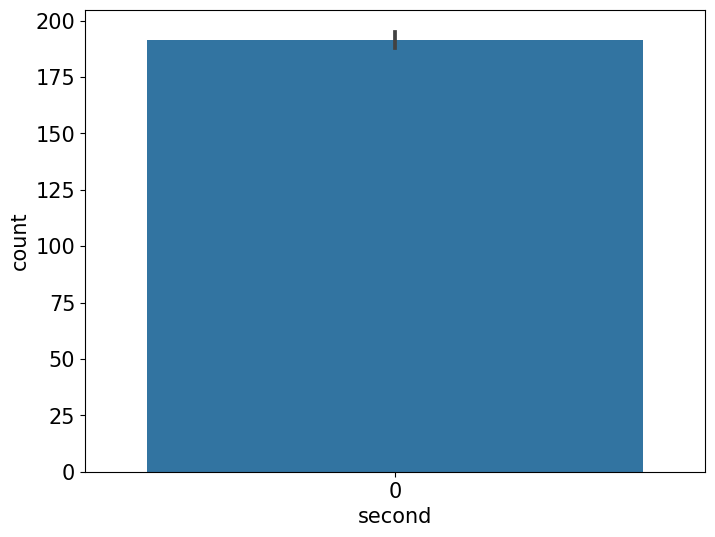

In [31]:
plt.figure(figsize=(8, 6))

# 초별 자전거 평균 대여 수량
sns.barplot(x='second', y='count', data=train);

- ⑥ 분별 평균 대여 수량 : 아무런 정보가 없어 제거

#### **<font color='orange'>[분석 결과] day, minute, second 피처 제거</font>**

### 박스플롯
- 박스플롯(box plot)은 범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프
- 계절, 날씨, 공휴일, 근무일(범주형 데이터)별 대여 수량(수치형 데이터)을 박스플롯으로 시각화

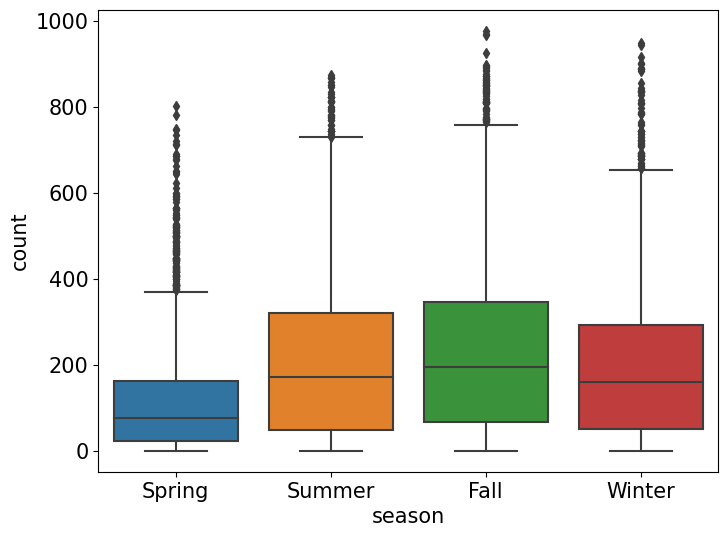

In [32]:
plt.figure(figsize=(8, 6))

# 계절별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train);

- ① 계절별 대여 수량 박스플롯 : Fall(실제로는 7~9월)에 자전거 평균 대여 수량이 가장 많음

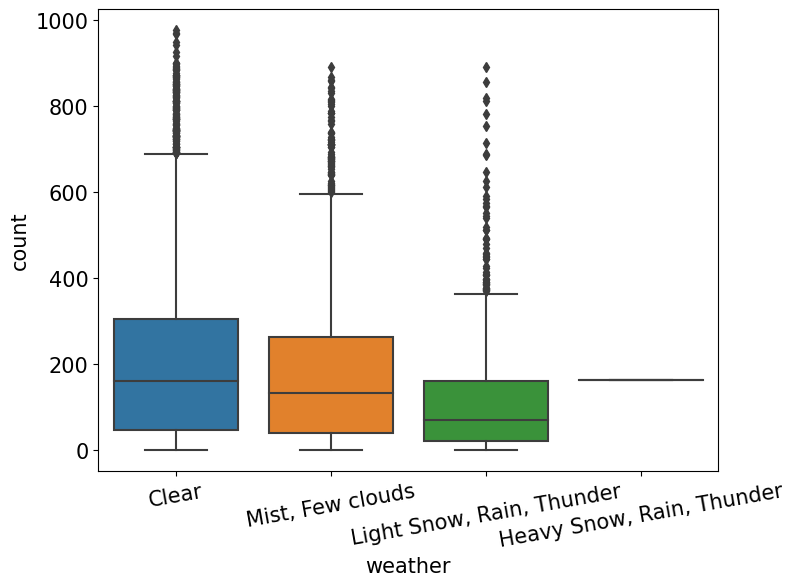

In [33]:
plt.figure(figsize=(8, 6))

# 날씨별 대여 수량 박스플롯
ax = sns.boxplot(x='weather', y='count', data=train)
ax.tick_params('x', labelrotation=10) # x축 10도 회전

- ② 날씨별 대여 수량 박스플롯 : 날씨가 좋을수록 대여 수량이 많음

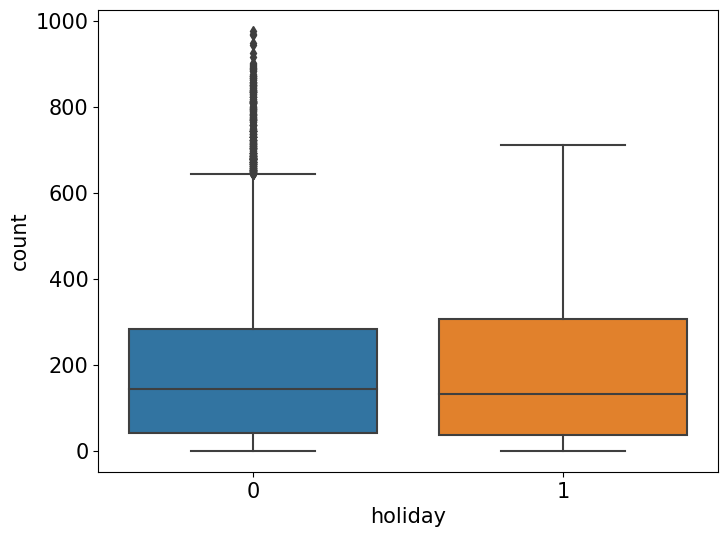

In [34]:
plt.figure(figsize=(8, 6))

# 공휴일별 대여 수량 박스플롯
sns.boxplot(x='holiday', y='count', data=train);

- ③ 공휴일 여부에 따른 대여 수량 박스플롯
 - x축 라벨 0 = 공휴일 아님, 1 = 공휴일
 - 공휴일이 아닐 때 이상치(outlier)가 많음

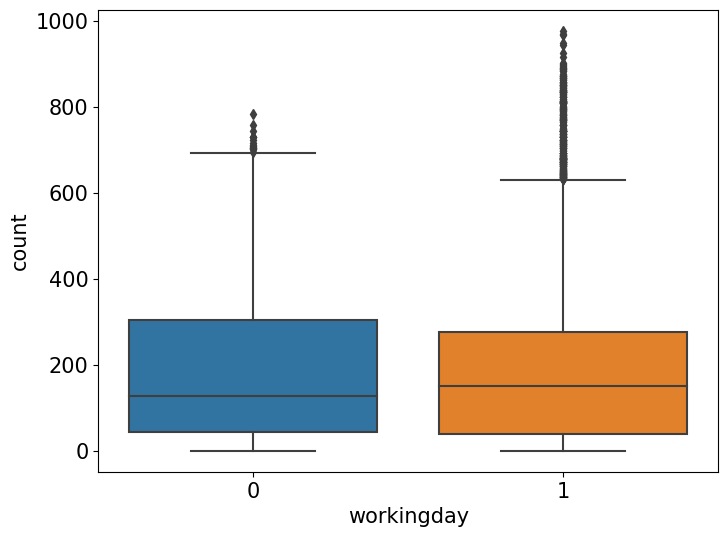

In [35]:
plt.figure(figsize=(8, 6))

# 근무일별 대여 수량 박스플롯
sns.boxplot(x='workingday', y='count', data=train);

- ④ 근무일 여부에 따른 대여 수량 박스플롯
 - 근무일일 때 이상치가 많음
 - 참고로, 근무일은 공휴일과 주말을 뺀 나머지 날을 뜻함

### 포인트플롯
- 포인트플롯(point plot)은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 점과 선으로 표시
- 막대 그래프와 같은 정보를 제공하지만, 한 화면에 여러 그래프를 겹쳐 그리기에 적합
 - hue 파라미터에 전달한 피처를 기준으로 그래프가 나뉨

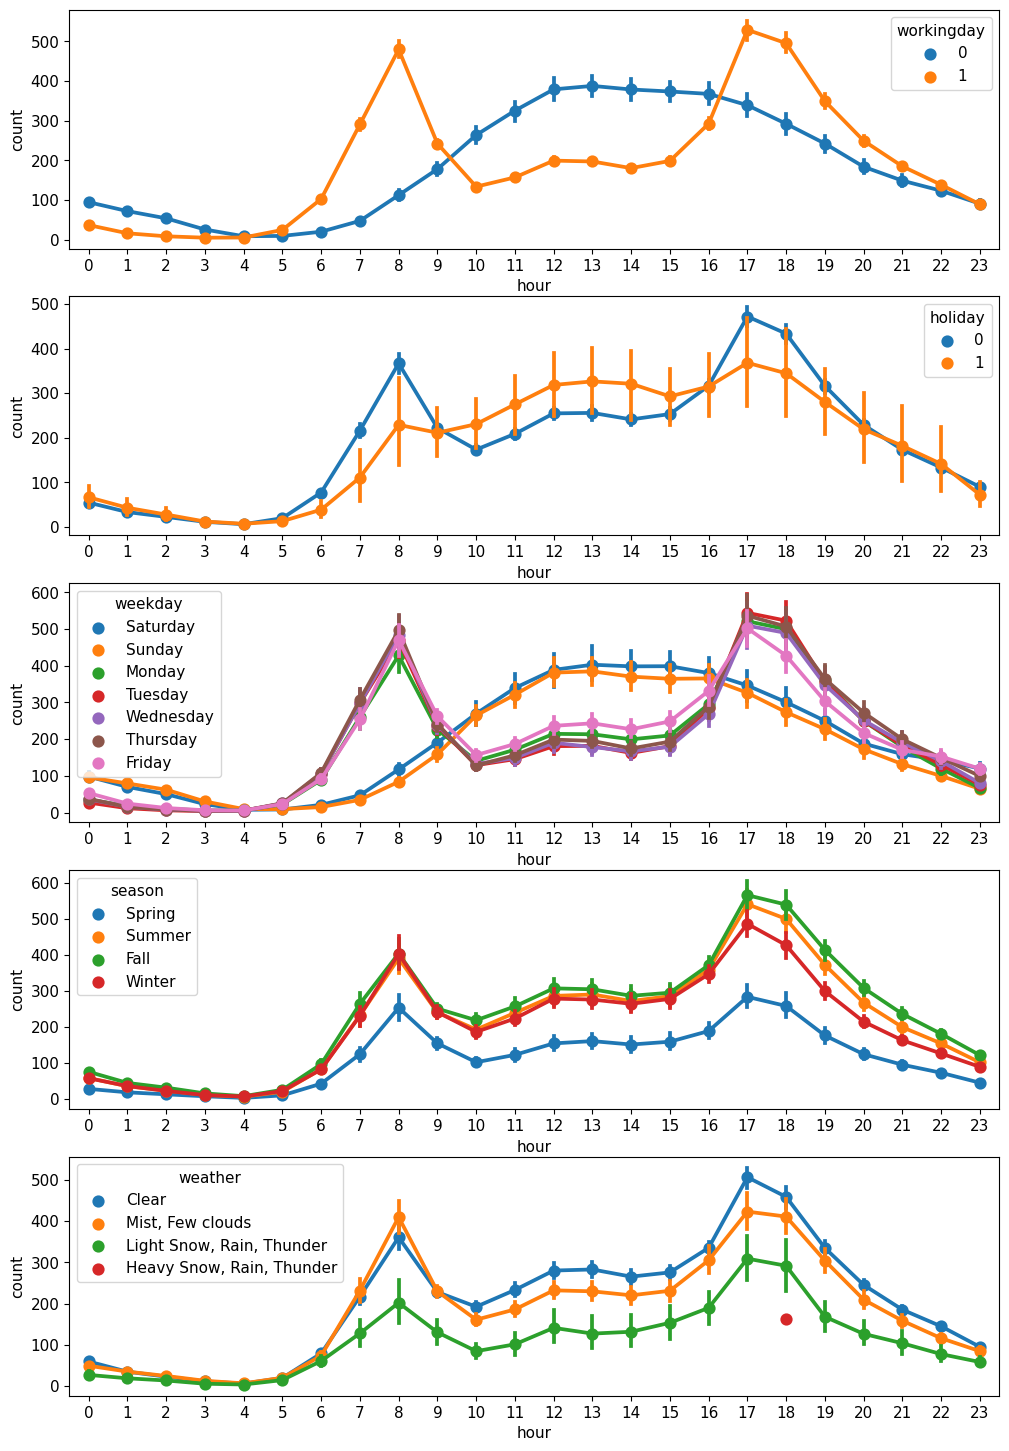

In [36]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

- 데이터를 2가지만 사용해 일대일 비교할 때보다, 이렇게 여러 개를 활용해 비교하면 더 유의미한 결과를 얻을 수 있음

#### **<font color='orange'>[분석 결과] weather == 4인 데이터 제거</font>**

### 회귀선을 포함한 산점도 그래프
- 회귀선을 포함한 산점도 그래프는 수치형 데이터 간 대략적인 상관관계를 파악하는 데 활용

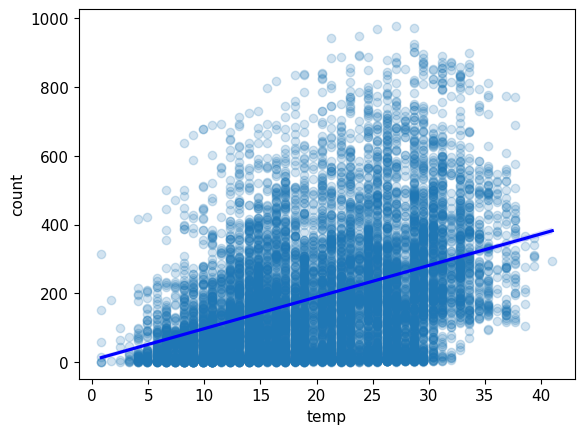

In [38]:
# 온도별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

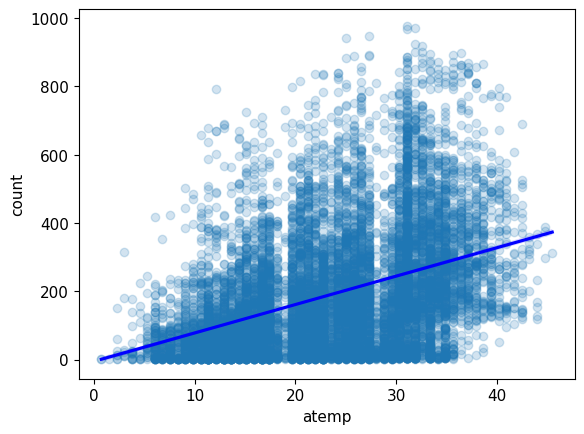

In [39]:
# 체감온도별 대여 수량 산점도 그래프
sns.regplot(x='atemp', y='count', data=train, scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

- ①과 ② 온도, 체감 온도와 대여 수량 관계 : 온도, 체감 온도가 높을수록 대여 수량이 많음

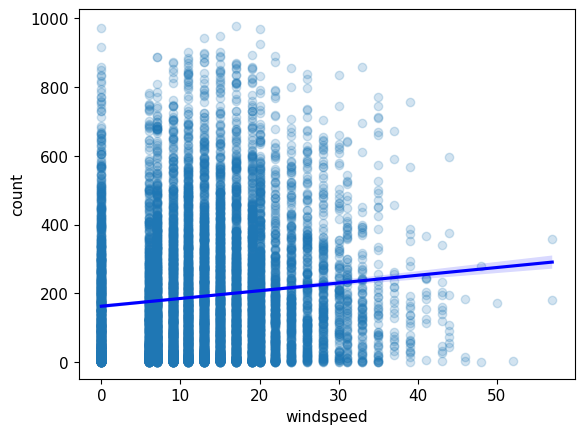

In [40]:
# 풍속별 대여 수량 산점도 그래프
sns.regplot(x='windspeed', y='count', data=train, scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});
# 빈곳 오류값으로 인해 아마 회귀선 잘못그려졌을 것이다 

- ③ 풍속과 대여 수량 관계
 - 풍속이 셀수록 대여 수량이 많음(?)
 - 결측치가 많기 때문
 - 결측치가 많은 windspeed 피처는 제거

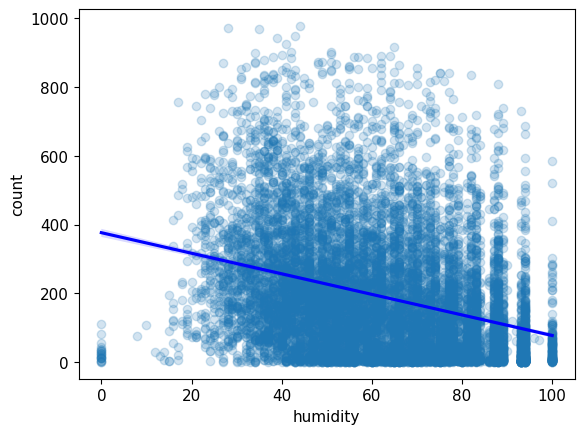

In [42]:
# 습도별 대여 수량 산점도 그래프
sns.regplot(x='humidity', y='count', data=train, scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});


- ④ 습도와 대여 수량 관계
 - 습하지 않을수록 대여 수량이 많음
 
 
 #### **<font color='orange'>[분석 결과] windspeed 피처 제거</font>**

### 히트맵
- 히트맵(heatmap)은 데이터 간 상관관계를 색상으로 시각화하는 그래프

- 수치형 데이터인 temp, atemp, humidity, windspeed, count 간 상관계수 계산

In [43]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


- 조합이 많아 피처간 관계가 한눈에 들어오지 않음 → 히트맵이 필요한 순간!

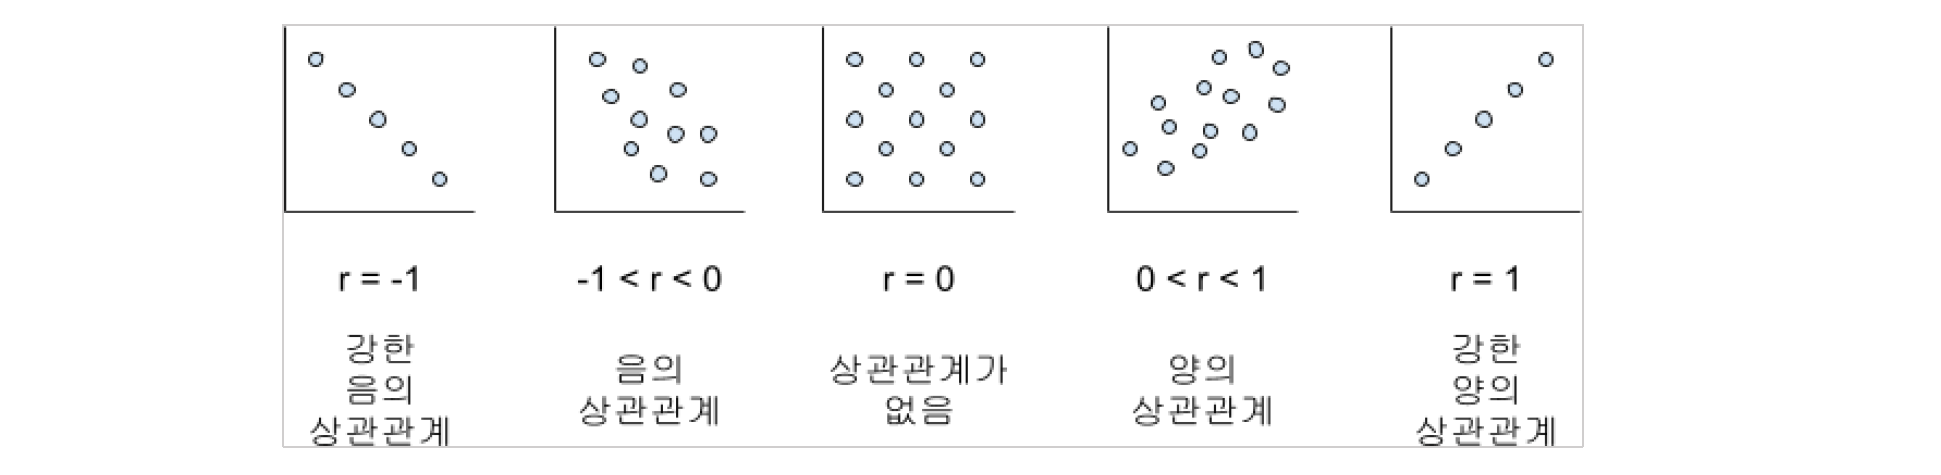

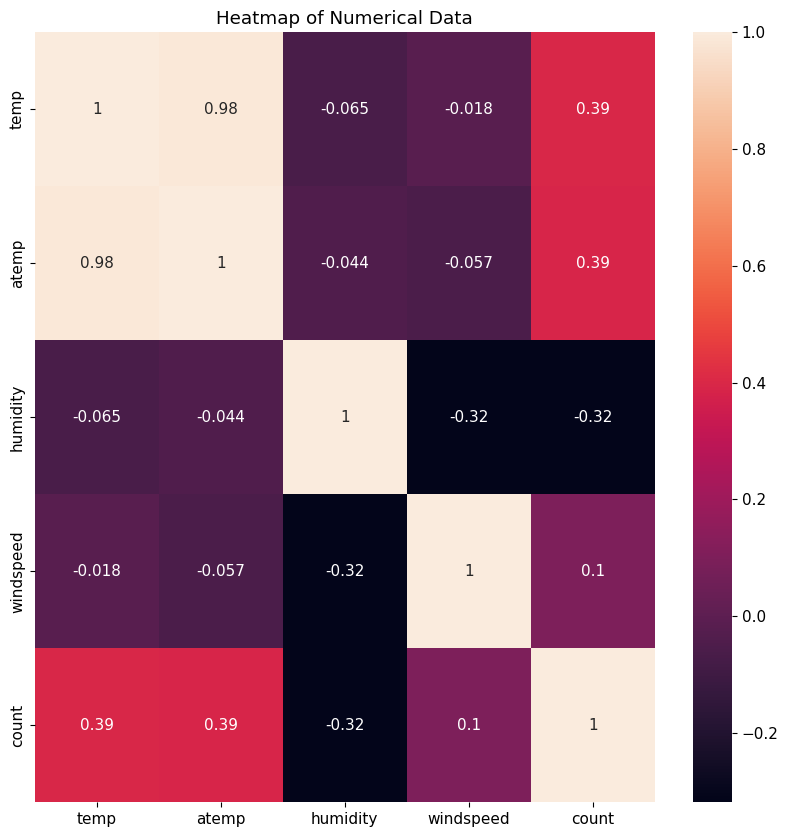

In [44]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

- 타깃값인 count와의 상관관계가 중요!
- 온도(temp)와 대여 수량(count) 간 상관계수는 0.39 (양의 상관관계)
- 풍속(windspeed)과 대여 수량의 상관계수는 0.1 (상관관계가 매우 약함)
 - windspeed 피처는 대여 수량 예측에 별 도움을 주지 못하므로 피처 제거
 - 회귀선을 포함한 산점도 그래프’ 결과에서도 결측치가 많다는 이유로 같은 결론에 도달한 바 있음
 
 
  #### **<font color='orange'>[분석 결과] windspeed 피처 제거</font>**

## 분석 결과
- [분석 결과] casual, registered 피처 제거
- [분석 결과] datetime 피처 제거
- [분석 결과] 연도, 월, 일, 시간, 분, 초, 요일 피처 추가
- [분석 결과] month 피처 제거
- [분석 결과] 타깃값을 count가 아닌 log(count)로 변환해 사용
- [분석 결과] 마지막에 지수변환해 count로 복원
- [분석 결과] day, minute, second 피처 제거
- [분석 결과] weather == 4인 데이터 제거
- [분석 결과] windspeed 피처 제거

## 분석 정리
1. 타깃값 변환 : 타깃값을 count가 아닌 log(count)로 변환해 사용(마지막에 다시 지수변환해 count로 복원해야 함)
2. 파생 피처 추가 : datetime 피처를 분리해 year, month, day, hour, minute, second, weekday 피처 생성 가능
3. 피처 제거 : 테스트 데이터에 없는 피처는 훈련에 사용해도 의미 없음. 따라서 훈련 데이터에만 있는 casual, registered 피처 제거
4. 피처 제거 : datetime 피처는 인덱스 역할만 하므로 타깃값 예측에 아무런 도움이 되지 않음
5. 피처 제거 : month는 season 피처의 세부 분류로 볼 수 있어 month 피처 제거
6. 피처 제거 : 막대 그래프 확인 결과, 파생 피처인 day는 분별력이 없음
7. 피처 제거 : 막대 그래프 확인 결과, 파생 피처인 minute와 second에는 아무런 정보가 담겨 있지 않음
8. 이상치 제거 : 포인트 플롯 확인 결과, weather가 4인 데이터는 이상치
9. 피처 제거 : 산점도와 히트맵 확인 결과, windspeed 피처에는 결측값이 많고 대여 수량과의 상관관계가 매우 약함